<a href="https://colab.research.google.com/github/maxliu/kaggle-titanic/blob/master/titanic_Copy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/titanic

# New Section

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import math

import pandas as pd
import numpy as np

import sklearn
import sklearn.linear_model
import sklearn.preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score, roc_auc_score )
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
trainFile = 'data/train.csv'
testFile = 'data/test.csv'

In [ ]:
df = pd.read_csv(trainFile)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [ ]:
# extract last name and title (Mr. Ms. ... )from name
import re

lastName_Gen = re.compile("\s*([a-zA-Z'_\s*]+),\s*(.*)\..*")

gs = lastName_Gen.match('Johnston, Midss. Catherine Helen "Carrie"')
print gs.groups()

def get_lastName_Gen(name):
    gs = lastName_Gen.match(name)
    if gs is None:
        return [np.NaN, np.NaN]
    else:
        return [str(x) for x in gs.groups()]


('Johnston', 'Midss')


In [ ]:
df_gen = pd.DataFrame(list(df['Name'].map(get_lastName_Gen)), columns=['lastname', 'gen'])

# stat. of all the columns

In [ ]:
ln=list(df_gen['lastname'].values)
ln_count = [ln.count(name) for name in ln]

In [ ]:
TickL_ln=list(df['Ticket'].values)
Tick_count = [ln.count(name) for name in ln]

In [ ]:
df['ln_count'] = ln_count

In [ ]:
df['gen'] = df_gen['gen']

In [ ]:
# feature summary
print df.columns
fea_smy = [[col, len(set(df[col])), df[col].dtype, df[col].isnull().sum()] for col in df.columns]  # find unique values
fea_smu_cols = ['name', 'unique Num', 'type', 'NaN num']
print "Total sample number:  ",len(df)
pd.DataFrame(fea_smy, columns=fea_smu_cols).sort_values(by='unique Num')

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'ln_count', u'gen'],
      dtype='object')
Total sample number:   891


,name,unique Num,type,NaN num
1,Survived,2,int64,0
4,Sex,2,object,0
2,Pclass,3,int64,0
11,Embarked,4,object,2
6,SibSp,7,int64,0
7,Parch,7,int64,0
12,ln_count,9,int64,0
13,gen,19,object,12
10,Cabin,148,object,687
9,Fare,248,float64,0


In [ ]:
df['Age']= df['Age'].fillna(df['Age'].mean())
#df['Embarked']= df['Embarked'].map({'Q':0, 'S':1, "C":2})
df['Sex']=df['Sex'].map({'male':1, 'female':0})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ln_count,gen
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Mr
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,3,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,6,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,2,Mrs


In [ ]:
norminalFea = ['Pclass','Sex','SibSp','Parch','Embarked','gen']
floatFea = ['Age', 'Fare','ln_count']

In [ ]:
def get_count(df, tgt, var):
    """this is for making plots of stat.
    
    """
    count ={y: [len(df[(df[tgt]==y) & (df[var]==x) ]) for x in set(df[var])] for y in set(df[tgt])}

    return pd.DataFrame(count, columns=set(df[tgt])), [var + "_" +str(x) for x in list(set(df[var]))]
    

Pclass
Sex
SibSp
Parch
Embarked
gen


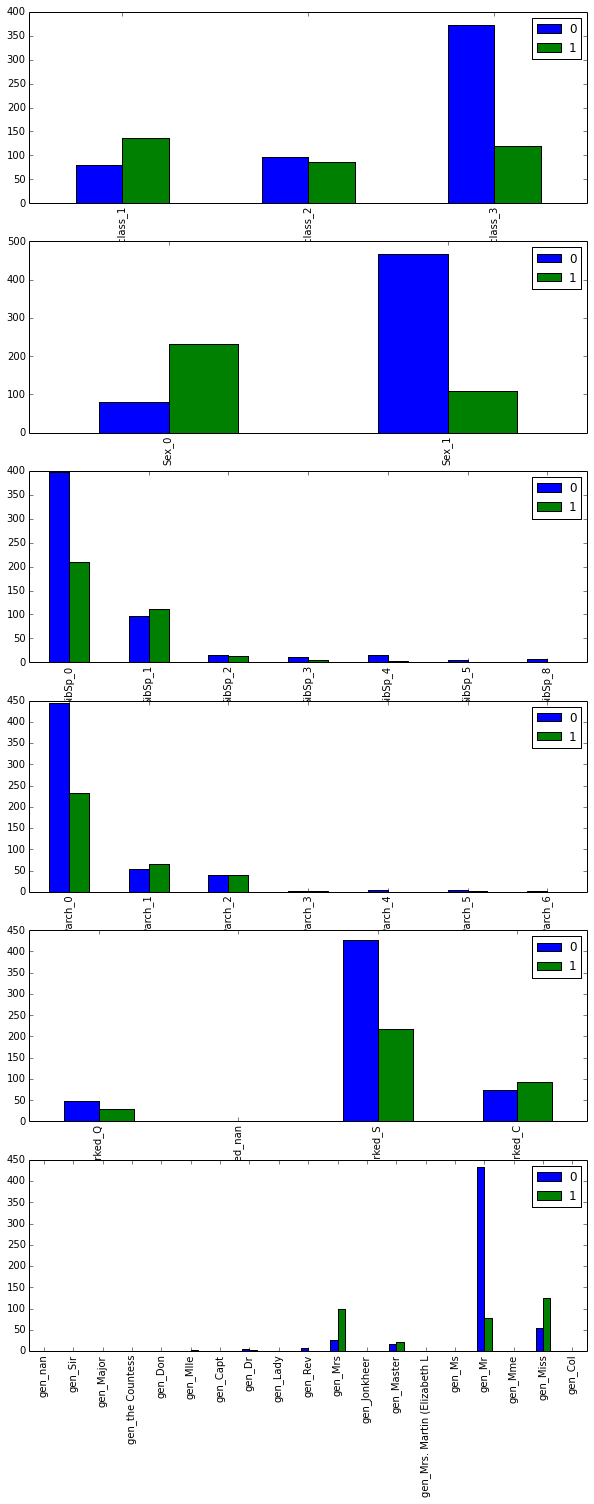

In [ ]:
figsize=(10,24)
f, axA = plt.subplots(len(norminalFea),1, figsize=figsize)
for i, fea in enumerate(norminalFea):
    print fea
    count, labels = get_count(df, "Survived", fea)
    ax = count.plot(kind='bar', ax=axA[i])
    ax.set_xticklabels(labels)

In [ ]:
grouped = df.groupby('Survived')

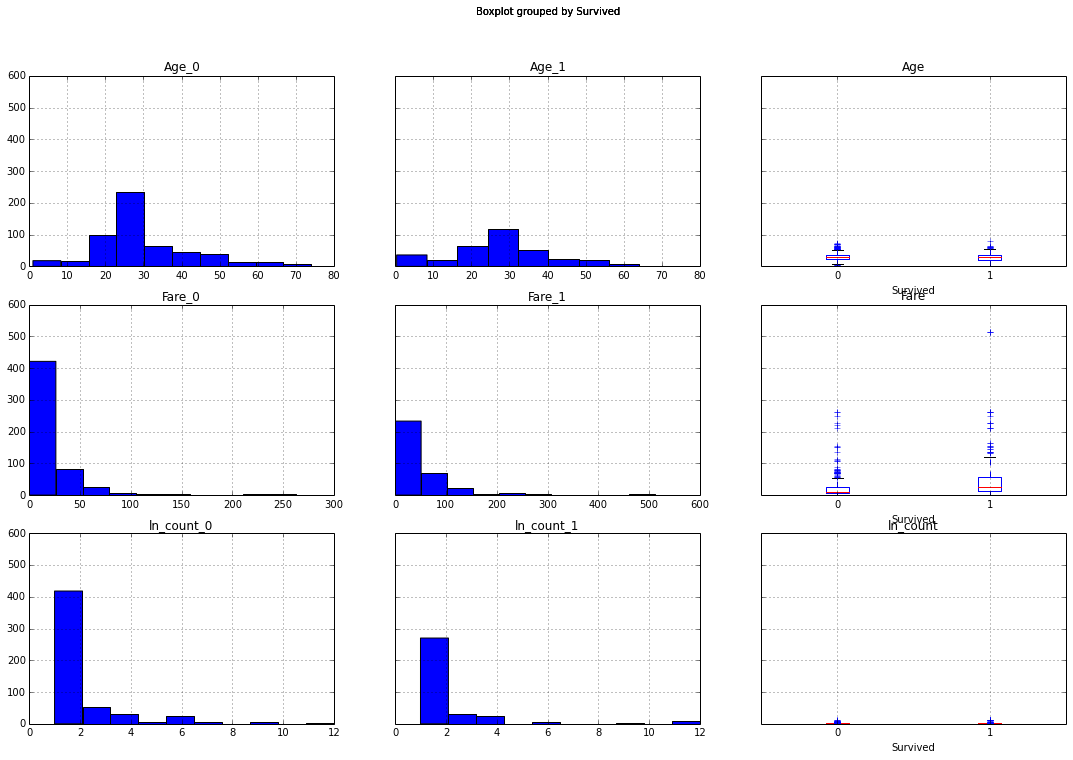

In [ ]:
f, ax = plt.subplots(len(floatFea),len(grouped)+1, sharey=True,figsize=(18,6*len(grouped)))

for j, fea in enumerate(floatFea):
    for i, (key, group) in enumerate(grouped):
        ax[j][i].set_title(str(fea)+"_"+str(key))
        group[fea].hist(bins=10,ax=ax[j][i] )
    df.boxplot(column=fea, by='Survived',ax=ax[j][2])
 

In [ ]:
# data preprocessing. one hot encoding
import sklearn.preprocessing
#enc_0 = sklearn.preprocessing.OneHotEncoder() 
norminalFea = ['Pclass','SibSp','Parch','Embarked','gen']
df = pd.get_dummies(df,prefix=norminalFea, dummy_na=False, columns=norminalFea)

In [ ]:
norminalFea_no_Sex = ['Pclass', 'SibSp', 'Parch', 'Em_new','gen_2']

In [ ]:
df.columns

Index([u'PassengerId', u'Survived', u'Name', u'Sex', u'Age', u'Ticket',
       u'Fare', u'Cabin', u'ln_count', u'Pclass_1', u'Pclass_2', u'Pclass_3',
       u'SibSp_0', u'SibSp_1', u'SibSp_2', u'SibSp_3', u'SibSp_4', u'SibSp_5',
       u'SibSp_8', u'Parch_0', u'Parch_1', u'Parch_2', u'Parch_3', u'Parch_4',
       u'Parch_5', u'Parch_6', u'Embarked_C', u'Embarked_Q', u'Embarked_S',
       u'gen_Capt', u'gen_Col', u'gen_Don', u'gen_Dr', u'gen_Jonkheer',
       u'gen_Lady', u'gen_Major', u'gen_Master', u'gen_Miss', u'gen_Mlle',
       u'gen_Mme', u'gen_Mr', u'gen_Mrs', u'gen_Mrs. Martin (Elizabeth L',
       u'gen_Ms', u'gen_Rev', u'gen_Sir', u'gen_the Countess'],
      dtype='object')

In [ ]:
df.drop(["Ticket", "Name", "Cabin","PassengerId"], inplace=True, axis=1)

In [ ]:
df_X = df.drop('Survived', axis=1)
X = np.array(df_X.values,dtype=float)
y = df['Survived'].values


In [ ]:
params_0 = {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 1,
          'learning_rate': 0.01}
params_1 = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1}

[37 34 29 41 38 26 30 25 28 17 20 33 24 40 27 19  9 12 18 13 39 16 22 10 11
 15 31  7 21  8  5 23 14  3  1  4  6 36 32  2  0 35]


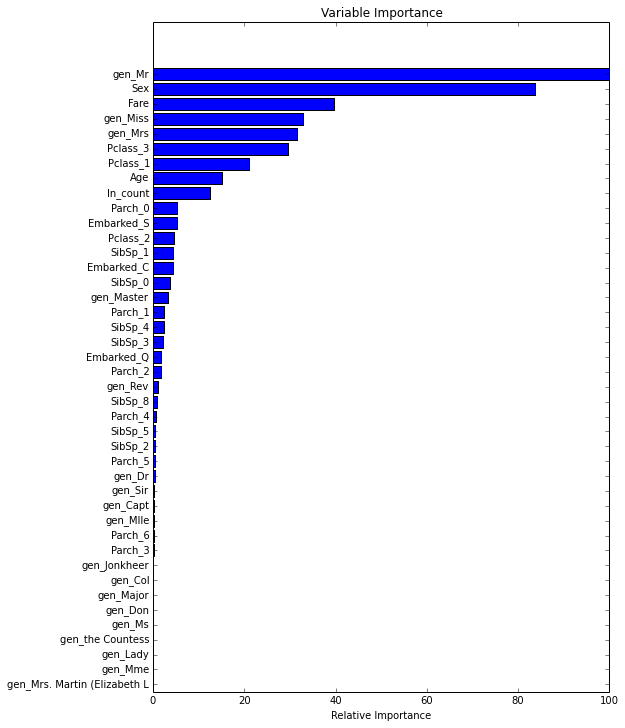

In [ ]:
# first analysis of feature importance

clf =  ensemble.RandomForestClassifier(**params_1)
clf.fit(X,y)
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print  sorted_idx
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(18,12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [ ]:
df_X.columns

Index([u'Sex', u'Age', u'Fare', u'ln_count', u'Pclass_1', u'Pclass_2',
       u'Pclass_3', u'SibSp_0', u'SibSp_1', u'SibSp_2', u'SibSp_3', u'SibSp_4',
       u'SibSp_5', u'SibSp_8', u'Parch_0', u'Parch_1', u'Parch_2', u'Parch_3',
       u'Parch_4', u'Parch_5', u'Parch_6', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'gen_Capt', u'gen_Col', u'gen_Don', u'gen_Dr',
       u'gen_Jonkheer', u'gen_Lady', u'gen_Major', u'gen_Master', u'gen_Miss',
       u'gen_Mlle', u'gen_Mme', u'gen_Mr', u'gen_Mrs',
       u'gen_Mrs. Martin (Elizabeth L', u'gen_Ms', u'gen_Rev', u'gen_Sir',
       u'gen_the Countess'],
      dtype='object')

In [ ]:
# feature combination and selection

import itertools
fea_d = dict(zip(df_X.columns,feature_importance))
cols = [key for key, val in fea_d.items() if val>8]  # val > 5 is better ?
len(cols)

9

In [ ]:
cols

['gen_Miss',
 'Sex',
 'Fare',
 'ln_count',
 'gen_Mr',
 'Age',
 'gen_Mrs',
 'Pclass_1',
 'Pclass_3']

In [ ]:
col_com = list(itertools.combinations(cols, 2))
len(col_com)

36

In [ ]:
col_com

[('gen_Miss', 'Sex'),
 ('gen_Miss', 'Fare'),
 ('gen_Miss', 'ln_count'),
 ('gen_Miss', 'gen_Mr'),
 ('gen_Miss', 'Age'),
 ('gen_Miss', 'gen_Mrs'),
 ('gen_Miss', 'Pclass_1'),
 ('gen_Miss', 'Pclass_3'),
 ('Sex', 'Fare'),
 ('Sex', 'ln_count'),
 ('Sex', 'gen_Mr'),
 ('Sex', 'Age'),
 ('Sex', 'gen_Mrs'),
 ('Sex', 'Pclass_1'),
 ('Sex', 'Pclass_3'),
 ('Fare', 'ln_count'),
 ('Fare', 'gen_Mr'),
 ('Fare', 'Age'),
 ('Fare', 'gen_Mrs'),
 ('Fare', 'Pclass_1'),
 ('Fare', 'Pclass_3'),
 ('ln_count', 'gen_Mr'),
 ('ln_count', 'Age'),
 ('ln_count', 'gen_Mrs'),
 ('ln_count', 'Pclass_1'),
 ('ln_count', 'Pclass_3'),
 ('gen_Mr', 'Age'),
 ('gen_Mr', 'gen_Mrs'),
 ('gen_Mr', 'Pclass_1'),
 ('gen_Mr', 'Pclass_3'),
 ('Age', 'gen_Mrs'),
 ('Age', 'Pclass_1'),
 ('Age', 'Pclass_3'),
 ('gen_Mrs', 'Pclass_1'),
 ('gen_Mrs', 'Pclass_3'),
 ('Pclass_1', 'Pclass_3')]

In [ ]:
def get_new_fea(dfx, cols, new_name=None, func=None, *a,**K):  # *k includes new_name , new func
    if isinstance(cols, str):

        return (cols, dfx[cols].values)

    name = (func.__name__) if new_name is None else new_name

    return (name + "_" + "_".join(cols), func(dfx, cols,*a, **K))
    

In [ ]:
def f_times(dfx, cols,**K):
    y = reduce(lambda x,y : x*y, [dfx[col] for col in cols])
    return y.values
    

In [ ]:
def f_add(dfx, cols, **K):
    
    try:
        tgt = K['tgt']
    except:
        raise ValueError("Need to know target numbers, please speciy tgt= for parameter")
            
    if tgt is None or tgt not in dfx.columns:
        raise ValueError("Can not find {}".format(tgt))
        
    X_t = dfx[list(cols)].values
    y_t = dfx[tgt].values
    LR = LogisticRegression(C= 1e5)
    LR.fit(X_t,y_t)
    coef = LR.coef_[0]
    
    y = reduce(lambda x,y : x+y, [coefx*dfx[col] for coefx, col in zip(coef,cols)])
    return y.values

In [ ]:
def get_feas(dfx, cols_list, funcs, **K): # **K for funcs
    for cols in cols_list:
        if isinstance(cols, str):
            yield get_new_fea(dfx, cols)
        else:
            if isinstance(funcs, list):
                for func in funcs:
                    yield  get_new_fea(dfx, cols, func=func, **K)
            else:
                yield  get_new_fea(dfx, cols, func=funcs, **K)

In [ ]:
td = {"a": [1,1,2,2,3,3], "b":[2,3,3,1,1,2], "c":[0,0,0,1,1,1]}
tdf = pd.DataFrame(td)
list(
    get_feas(tdf, ["a", "b",("a","b")],[f_add,f_times], tgt="c" ))

[('a', array([1, 1, 2, 2, 3, 3])),
 ('b', array([2, 3, 3, 1, 1, 2])),
 ('f_add_a_b', array([ -9.62440194, -19.24880389,  -9.62440194,   9.62440194,
          19.24880389,   9.62440194])),
 ('f_times_a_b', array([2, 3, 6, 2, 3, 6]))]

In [ ]:
td = {"a": [1,1,2,2,3,3], "b":[2,3,3,1,1,2], "c":[0,0,0,1,1,1]}
tdf = pd.DataFrame(td)
get_new_fea(tdf, ["a","b"],func=f_add, tgt="c")

('f_add_a_b', array([ -9.62440194, -19.24880389,  -9.62440194,   9.62440194,
         19.24880389,   9.62440194]))

In [ ]:
selectdFea = ["Age","Sex","Fare"]

In [ ]:
feaList = list(get_feas(df, cols+col_com,[f_add, f_times],tgt='Survived'))

In [ ]:
print cols
len(feaList)

['gen_Miss', 'Sex', 'Fare', 'ln_count', 'gen_Mr', 'Age', 'gen_Mrs', 'Pclass_1', 'Pclass_3']


81

In [ ]:
dfFea = pd.DataFrame(dict(feaList))
dfFea['Survived'] = df['Survived']

In [ ]:
len(dfFea.columns)

82

In [ ]:
from sklearn.cross_validation import cross_val_score
def socreFunc(clf, pd, feas, tgt, cv=5, scoring=None):
    X = pd[feas].values
    y = pd[tgt].values
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    return scores.mean(), scores.std()

"""valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', \
'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error',
                     'mean_squared_error', 'median_absolute_error', 'precision', 
                     'precision_macro', 'precision_micro', 'precision_samples', 
                     'precision_weighted', 'r2', 'recall', 'recall_macro',"""


"valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error',\n                     'mean_squared_error', 'median_absolute_error', 'precision', \n                     'precision_macro', 'precision_micro', 'precision_samples', \n                     'precision_weighted', 'r2', 'recall', 'recall_macro',"

In [ ]:
selectdFea = cols
print selectdFea 

['gen_Miss', 'Sex', 'Fare', 'ln_count', 'gen_Mr', 'Age', 'gen_Mrs', 'Pclass_1', 'Pclass_3']


In [ ]:
selectdFea =[]
if len(selectdFea) == 0:
    score0 = 0
    std0 = np.inf
else:
    clf =  ensemble.GradientBoostingClassifier(**params_0)
    score0, std0 = socreFunc(clf, dfFea, selectdFea, 'Survived', scoring='accuracy' )
print score0 , std0,  selectdFea
while True:
    feax = None
    for col in dfFea.columns:
        if col not in selectdFea +['Survived']:
            score, std = socreFunc(clf, dfFea, selectdFea + [col], 'Survived', scoring='accuracy' )
            if (score >= score0) : #& (std <= 2.0  * std0):
                feax = col
                print feax, score, std
                score0, std0 = score, std
    if feax is None:
        break
    else:
        selectdFea += [feax]
        print score0, std0, selectdFea
print "Finished"
        
            

0 inf []
Age 0.614012441365 0.0304395748545
Fare 0.693713319481 0.0293102247556
Sex 0.786715024929 0.0188788627506
f_add_Fare_gen_Mr 0.813725540262 0.0201601966534
0.813725540262 0.0201601966534 ['f_add_Fare_gen_Mr']
Fare 0.815966454204 0.0208085402138
Pclass_3 0.819343659645 0.0194730095569
f_add_Fare_Pclass_3 0.822714588017 0.0155641890225
f_add_Pclass_1_Pclass_3 0.823831835525 0.0178766110686
0.823831835525 0.0178766110686 ['f_add_Fare_gen_Mr', 'f_add_Pclass_1_Pclass_3']
Pclass_1 0.823831835525 0.0178766110686
Pclass_3 0.823831835525 0.0178766110686
Sex 0.831728531268 0.0308468734472
f_add_Sex_Pclass_1 0.832839572634 0.0266454060095
f_times_Sex_Fare 0.833950543073 0.0258184416899
0.833950543073 0.0258184416899 ['f_add_Fare_gen_Mr', 'f_add_Pclass_1_Pclass_3', 'f_times_Sex_Fare']
Pclass_1 0.833950543073 0.0258184416899
Pclass_3 0.833950543073 0.0258184416899
f_times_Fare_Pclass_3 0.835074209506 0.023520659383
f_times_gen_Miss_Age 0.838482800297 0.0366213913525
0.838482800297 0.0366213

In [ ]:

0.835042895084 ['Age', 'Sex', 'f_add_Parch_0_Pclass_1', 'f_add_Age_Pclass_2', 'f_add_Age_gen_Mrs', 'SibSp_1', 'Pclass_3', 'f_add_Parch_0_Pclass_2', 'f_add_Pclass_3_SibSp_1']

0.843993925782 ['Age', 'Sex', 'f_add_Fare_Pclass_3', 'f_add_Fare_ln_count', 'f_add_gen_Mr_Pclass_1', 'f_times_gen_Miss_SibSp_1', 'f_times_Pclass_3_SibSp_1', 'f_times_Sex_Pclass_1', 'f_times_Sex_Pclass_3']

0.844019104989 ['Age', 'f_add_Sex_Pclass_2', 'f_times_Fare_Pclass_3', 'f_times_ln_count_Pclass_3', 'f_add_gen_Mr_Pclass_3', 'f_times_gen_Mrs_Pclass_2', 'f_times_Sex_Fare', 'f_add_gen_Miss_gen_Mrs', 'f_times_gen_Miss_SibSp_1', 'f_add_gen_Mrs_Pclass_2']

0.841828549461 ['f_add_Fare_gen_Mr', 'f_add_Sex_Pclass_3', 'f_add_Fare_Pclass_3', 'f_times_gen_Miss_SibSp_1', 'f_add_gen_Mr_Pclass_2', 'f_times_Fare_gen_Mr', 'f_times_Sex_Fare']

TypeError: 'float' object has no attribute '__getitem__'

In [ ]:
selectdFea

['f_add_Fare_gen_Mr',
 'f_add_Pclass_1_Pclass_3',
 'f_times_Sex_Fare',
 'f_times_gen_Miss_Age',
 'f_times_Age_gen_Mrs',
 'f_times_Sex_Pclass_3',
 'f_times_gen_Mrs_Pclass_1',
 'Pclass_1',
 'gen_Miss']

In [ ]:
dfFea

,Age,Fare,Pclass_1,Pclass_3,Sex,f_add_Age_Pclass_1,f_add_Age_Pclass_3,f_add_Age_gen_Mrs,f_add_Fare_Age,f_add_Fare_Pclass_1,...,f_times_ln_count_Age,f_times_ln_count_Pclass_1,f_times_ln_count_Pclass_3,f_times_ln_count_gen_Mr,f_times_ln_count_gen_Mrs,gen_Miss,gen_Mr,gen_Mrs,ln_count,Survived
0,22.000000,7.2500,0,1,1,-0.705925,-2.308811,-0.525936,-0.264443,0.059207,...,44.000000,0,2,2,0,0,1,0,2,0
1,38.000000,71.2833,1,0,0,0.495264,-1.167711,1.403248,0.495005,1.443867,...,38.000000,1,0,0,1,0,0,1,1,1
2,26.000000,7.9250,0,1,0,-0.834275,-2.431728,-0.621561,-0.322941,0.064720,...,26.000000,0,1,0,0,1,0,0,1,1
3,35.000000,53.1000,1,0,0,0.591527,-1.075524,1.474966,0.252556,1.295372,...,70.000000,2,0,0,2,0,0,1,2,1
4,35.000000,8.0500,0,1,1,-1.123062,-2.708291,-0.836716,-0.477137,0.065741,...,70.000000,0,2,2,0,0,1,0,2,0
5,29.699118,8.4583,0,1,1,-0.952970,-2.545399,-0.709992,-0.378512,0.069075,...,89.097353,0,3,3,0,0,1,0,3,0
6,54.000000,51.8625,1,0,1,-0.018136,-1.659379,-1.290934,-0.097288,1.285266,...,54.000000,1,0,1,0,0,1,0,1,0
7,2.000000,21.0750,0,1,1,-0.064175,-1.694226,-0.047812,0.306645,0.172110,...,8.000000,0,4,0,0,0,0,0,4,0
8,27.000000,11.1333,0,1,0,-0.866362,-2.462457,1.666216,-0.288333,0.090920,...,162.000000,0,6,0,6,0,0,1,6,1
9,14.000000,30.0708,0,0,0,-0.449225,-0.430209,1.976996,0.244058,0.245574,...,28.000000,0,0,0,2,0,0,1,2,1


In [ ]:
df_X = dfFea[selectdFea]
clf =  ensemble.GradientBoostingClassifier(**params_0)
score, std = socreFunc(clf, dfFea, selectdFea , 'Survived', scoring='accuracy' )
print score, std

0.846304029347 0.0298762595154


In [ ]:
X = df_X.values
y = dfFea['Survived'].values

In [ ]:
clf.fit(X,y)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=1,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
df_X.columns

Index([u'f_add_Fare_gen_Mr', u'f_add_Pclass_1_Pclass_3', u'f_times_Sex_Fare',
       u'f_times_gen_Miss_Age', u'f_times_Age_gen_Mrs',
       u'f_times_Sex_Pclass_3', u'f_times_gen_Mrs_Pclass_1', u'Pclass_1',
       u'gen_Miss'],
      dtype='object')

[6 8 7 5 1 4 3 2 0]


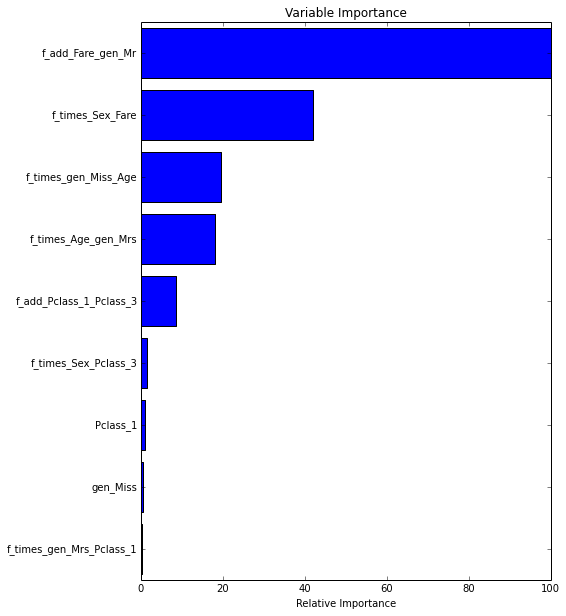

In [ ]:

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print  sorted_idx
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(25,10))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [ ]:
feature_importance

array([ 100.        ,    8.64060754,   41.91612614,   19.56224351,
         18.06641155,    1.46453285,    0.27522711,    0.99291   ,
          0.64206522])

In [ ]:
len([ x  for x in feature_importance > 0.01 if x ])

9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_test, y_test = X_train, y_train

In [ ]:
ests = [LogisticRegression(C=1e5),
      GaussianNB(),
      ensemble.RandomForestClassifier(),
      SVC(probability=True),
      ensemble.GradientBoostingClassifier(**params_0),
    ensemble.ExtraTreesClassifier(**params_1)
        
      ]


In [ ]:
    for clf in ests:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        prob_pos = clf.predict_proba(X_test)[:, 1]

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" %  clf.__class__.__name__)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f" % f1_score(y_test, y_pred))
        print("\tauc: %1.3f\n" % roc_auc_score(y_test, prob_pos))

LogisticRegression:
	Brier: 0.160
	Precision: 0.741
	Recall: 0.541
	F1: 0.625
	auc: 0.852

GaussianNB:
	Brier: 0.221
	Precision: 0.750
	Recall: 0.649
	F1: 0.696
	auc: 0.824

RandomForestClassifier:
	Brier: 0.117
	Precision: 0.800
	Recall: 0.757
	F1: 0.778
	auc: 0.907

SVC:
	Brier: 0.150
	Precision: 0.767
	Recall: 0.757
	F1: 0.762
	auc: 0.870

GradientBoostingClassifier:
	Brier: 0.118
	Precision: 0.838
	Recall: 0.770
	F1: 0.803
	auc: 0.897

ExtraTreesClassifier:
	Brier: 0.143
	Precision: 0.736
	Recall: 0.716
	F1: 0.726
	auc: 0.870



In [ ]:
params = [{'n_estimators': nes, 'max_depth': md, 'min_samples_split': 1,
          'learning_rate': 0.01} for nes in [500,1000] for md in [4]]  # in nes in [500, 1000, 2000, 4000]

ests = [ ensemble.GradientBoostingClassifier(**p) for p in params]

In [ ]:
params = [{'n_estimators': nes, 'max_depth': md, 'min_samples_split': 1} \
          for nes in [500,1000,2000,4000] for md in [4,8]]
ests.extend([ensemble.RandomForestClassifier(**p) for p in params])

In [ ]:
ests

[GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
               max_depth=4, max_features=None, max_leaf_nodes=None,
               min_samples_leaf=1, min_samples_split=1,
               min_weight_fraction_leaf=0.0, n_estimators=500,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
               max_depth=4, max_features=None, max_leaf_nodes=None,
               min_samples_leaf=1, min_samples_split=1,
               min_weight_fraction_leaf=0.0, n_estimators=1000,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=4, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=1,
             min_weight_fraction_leaf=0.0, n_estimator

In [ ]:
from  blend import modelBlent
from sklearn.linear_model import LogisticRegression

In [ ]:
bclf = modelBlent(ests, LogisticRegression(), n_folds=5)

In [ ]:
bclf.fit(X_train, y_train)



In [ ]:
def score_report(clf, X_test, y_test):
    
    try:
        prob_pos, y_pred = clf.predict(X_test)
    except ValueError:
        y_pred = clf.predict(X_test)
        prob_pos = clf.predict_proba(X_test)[:,1]
    bclf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
    print("%s:" %  clf.__class__.__name__)
    print("\tBrier: %1.3f" % (bclf_score))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f" % f1_score(y_test, y_pred))
    print("\tauc: %1.3f\n" % roc_auc_score(y_test, prob_pos))

In [ ]:
score_report(bclf, X_test, y_test)

modelBlent:
	Brier: 0.119
	Precision: 0.822
	Recall: 0.811
	F1: 0.816
	auc: 0.912



In [ ]:
for clf in bclf.clfs:
    score_report(clf, X_test, y_test)

GradientBoostingClassifier:
	Brier: 0.118
	Precision: 0.855
	Recall: 0.797
	F1: 0.825
	auc: 0.911

GradientBoostingClassifier:
	Brier: 0.117
	Precision: 0.811
	Recall: 0.811
	F1: 0.811
	auc: 0.906

RandomForestClassifier:
	Brier: 0.134
	Precision: 0.786
	Recall: 0.743
	F1: 0.764
	auc: 0.886

RandomForestClassifier:
	Brier: 0.118
	Precision: 0.808
	Recall: 0.797
	F1: 0.803
	auc: 0.911

RandomForestClassifier:
	Brier: 0.134
	Precision: 0.786
	Recall: 0.743
	F1: 0.764
	auc: 0.883

RandomForestClassifier:
	Brier: 0.120
	Precision: 0.819
	Recall: 0.797
	F1: 0.808
	auc: 0.905

RandomForestClassifier:
	Brier: 0.134
	Precision: 0.771
	Recall: 0.730
	F1: 0.750
	auc: 0.884

RandomForestClassifier:
	Brier: 0.119
	Precision: 0.819
	Recall: 0.797
	F1: 0.808
	auc: 0.906

RandomForestClassifier:
	Brier: 0.134
	Precision: 0.775
	Recall: 0.743
	F1: 0.759
	auc: 0.885

RandomForestClassifier:
	Brier: 0.119
	Precision: 0.819
	Recall: 0.797
	F1: 0.808
	auc: 0.907



In [ ]:
X_test

In [ ]:
coef = bclf.blentClf.coef_[0]
print coef

In [ ]:
bclf.blend_X
[clf for clf, s in zip(bclf.clfs, coef) if s >0]

In [ ]:
dir(bclf)